# Impact of Trading Horizon and Frequency on the Salopek Strategy

In [1]:
import numpy.typing as npt
import numpy as np
from typing import Union
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# own module
from simulations.fractional_brownian import (
    generate_brownian_path,
    generate_n_assets_portfolio,
)
from backtest.backtester import Backtester
from strategy.strategy import SalopekStrategy

from utility.utils import generate_t, a_order_power_mean, transaction_cost_L

# Horizon

In [2]:
T = np.linspace(0.5, 10, 20)
P = [[0, 0], [0.1, 0], [0.1, 0.5]]
N_SIMULATION = 300
ALPHA = -30
BETA = 30
SCALING_FACTOR = 1

salopek_strat = SalopekStrategy(alpha=ALPHA, beta=BETA)
bk_tester = Backtester()

mean_terminal_portfolio_value_phi = []
mean_terminal_portfolio_value_psi = []
loss_probabilities = []

i=0
for probas in P:
    mean_terminal_V_t_psi = []
    mean_terminal_V_t_phi = []
    loss_proba = []
    for t in T:
        i+=1
        print("Batch numéro :", i)
        terminal_V_t_psi = []
        terminal_V_t_phi = []
        for _ in tqdm(range(N_SIMULATION), leave=False, desc="Computing MC simulation...", total=N_SIMULATION):
            df_ptf = generate_n_assets_portfolio(
                n_assets=2,
                n_steps=251,
                T=t,
                H=0.7,
                mu=0.05,
                sigma=0.1,
                s0=100,
                add_risk_free_asset=False,
                as_dataframe=True,
                brownian_type="fractional",
            )
            _, V_t_psi, V_t_phi, transaction_account = bk_tester.run_backtest(
                universe_dataframe=df_ptf,
                allocation_function=salopek_strat.get_allocation,
                p1=probas[0],
                p2=probas[1],
            )
            terminal_V_t_psi.append(V_t_psi[-2])
            terminal_V_t_phi.append(V_t_phi[-2])
            del df_ptf
        mean_terminal_V_t_phi.append(np.mean(terminal_V_t_phi))
        mean_terminal_V_t_psi.append(np.mean(terminal_V_t_psi))
        loss_proba.append(sum(v < 0 for v in terminal_V_t_phi) / len(terminal_V_t_phi))
    mean_terminal_portfolio_value_phi.append(mean_terminal_V_t_phi)
    mean_terminal_portfolio_value_psi.append(mean_terminal_V_t_psi)
    loss_probabilities.append(loss_proba)


Batch numéro : 1


Batch numéro : 2


Batch numéro : 3


Batch numéro : 4


Batch numéro : 5


Batch numéro : 6


Batch numéro : 7


Batch numéro : 8


Batch numéro : 9


Batch numéro : 10


Batch numéro : 11


Batch numéro : 12


Batch numéro : 13


Batch numéro : 14


Batch numéro : 15


Batch numéro : 16


Batch numéro : 17


Batch numéro : 18


Batch numéro : 19


Batch numéro : 20


Batch numéro : 21


Batch numéro : 22


Batch numéro : 23


Batch numéro : 24


Batch numéro : 25


Batch numéro : 26


Batch numéro : 27


Batch numéro : 28


Batch numéro : 29


Batch numéro : 30


Batch numéro : 31


Batch numéro : 32


Batch numéro : 33


Batch numéro : 34


Batch numéro : 35


Batch numéro : 36


Batch numéro : 37


Batch numéro : 38


Batch numéro : 39


Batch numéro : 40


Batch numéro : 41


Batch numéro : 42


Batch numéro : 43


Batch numéro : 44


Batch numéro : 45


Batch numéro : 46


Batch numéro : 47


Batch numéro : 48


Batch numéro : 49


Batch numéro : 50


Batch numéro : 51


Batch numéro : 52


Batch numéro : 53


Batch numéro : 54


Batch numéro : 55


Batch numéro : 56


Batch numéro : 57


Batch numéro : 58


Batch numéro : 59


Batch numéro : 60


In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.plot(T, mean_terminal_portfolio_value_phi[0], 'g--', marker="o", label='p = (0,0)')
plt.plot(T, mean_terminal_portfolio_value_phi[1], 'b--', marker="s", label='p = (0.1,0)')
plt.plot(T, mean_terminal_portfolio_value_phi[2], 'r--', marker='P', label='p = (0.1,0.5)')
plt.plot(T, mean_terminal_portfolio_value_psi[0], 'k--', marker='^', label='continuous')

plt.xlabel('Time Horizon T in Years')
plt.xticks(T)
plt.title('Mean terminal portfolio value')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 8))

plt.plot(T, loss_probabilities[0], 'g--', marker="o", label='p = (0,0)')
plt.plot(T, loss_probabilities[1], 'b--', marker="s", label='p = (0.1,0)')
plt.plot(T, loss_probabilities[2], 'r--', marker='P', label='p = (0.1,0.5)')

plt.xlabel('Time Horizon T in Years')
plt.xticks(T)
plt.title('Loss Probability')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

# Frequency

In [5]:
nb_steps = [13, 26, 51, 126, 251]
P = [[0, 0], [0.1, 0], [0.1, 0.5]]
N_SIMULATION = 300
ALPHA = -30
BETA = 30
SCALING_FACTOR = 1

salopek_strat = SalopekStrategy(alpha=ALPHA, beta=BETA)
bk_tester = Backtester()

mean_terminal_portfolio_value_phi = []
mean_terminal_portfolio_value_psi = []
loss_probabilities = []

for probas in P:
    mean_terminal_V_t_psi = []
    mean_terminal_V_t_phi = []
    loss_proba = []
    for step in nb_steps:
        terminal_V_t_psi = []
        terminal_V_t_phi = []
        for _ in tqdm(range(N_SIMULATION), leave=False, desc="Computing MC simulation...", total=N_SIMULATION):
            df_ptf = generate_n_assets_portfolio(
                n_assets=2,
                n_steps=step,
                T=1,
                H=0.7,
                mu=0.05,
                sigma=0.1,
                s0=100,
                add_risk_free_asset=False,
                as_dataframe=True,
                brownian_type="fractional",
            )
            _, V_t_psi, V_t_phi, transaction_account = bk_tester.run_backtest(
                universe_dataframe=df_ptf,
                allocation_function=salopek_strat.get_allocation,
                p1=probas[0],
                p2=probas[1],
            )
            terminal_V_t_psi.append(V_t_psi[-2])
            terminal_V_t_phi.append(V_t_phi[-2])
            del df_ptf
        mean_terminal_V_t_phi.append(np.mean(terminal_V_t_phi))
        mean_terminal_V_t_psi.append(np.mean(terminal_V_t_psi))
        loss_proba.append(sum(v < 0 for v in terminal_V_t_phi) / len(terminal_V_t_phi))
    mean_terminal_portfolio_value_phi.append(mean_terminal_V_t_phi)
    mean_terminal_portfolio_value_psi.append(mean_terminal_V_t_psi)
    loss_probabilities.append(loss_proba)


generate all paths of the portfolio:   0%|          | 0/2 [00:00<?, ?it/s]

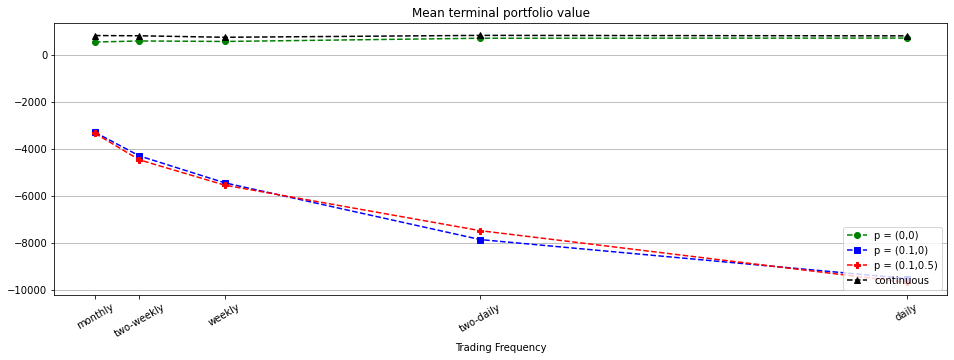

In [6]:
fig, ax = plt.subplots(figsize=(16, 5))
x = ["monthly", "two-weekly", "weekly", "two-daily", "daily"]
plt.plot(nb_steps, mean_terminal_portfolio_value_phi[0], 'g--', marker="o", label='p = (0,0)')
plt.plot(nb_steps, mean_terminal_portfolio_value_phi[1], 'b--', marker="s", label='p = (0.1,0)')
plt.plot(nb_steps, mean_terminal_portfolio_value_phi[2], 'r--', marker='P', label='p = (0.1,0.5)')
plt.plot(nb_steps, mean_terminal_portfolio_value_psi[0], 'k--', marker='^', label='continuous')

plt.xlabel('Trading Frequency')
plt.xticks(nb_steps)
ax.set_xticklabels(x, rotation=30)
plt.title('Mean terminal portfolio value')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

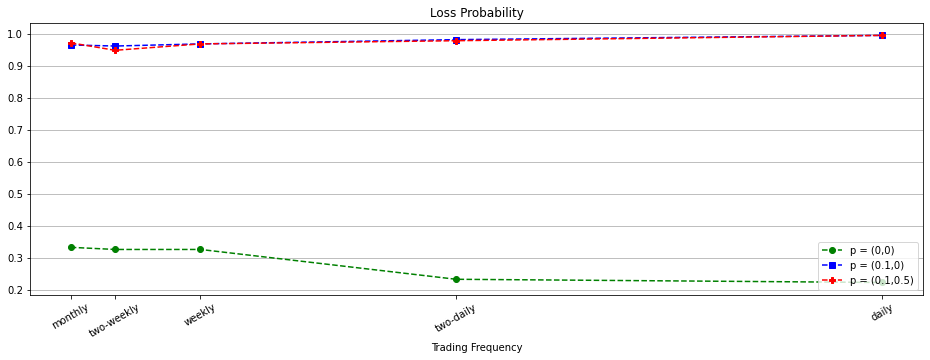

In [7]:
fig, ax = plt.subplots(figsize=(16, 5))
x = ["monthly", "two-weekly", "weekly", "two-daily", "daily"]

plt.plot(nb_steps, loss_probabilities[0], 'g--', marker="o", label='p = (0,0)')
plt.plot(nb_steps, loss_probabilities[1], 'b--', marker="s", label='p = (0.1,0)')
plt.plot(nb_steps, loss_probabilities[2], 'r--', marker='P', label='p = (0.1,0.5)')

plt.xlabel('Trading Frequency')
plt.xticks(nb_steps)
ax.set_xticklabels(x, rotation=30)
plt.title('Loss Probability')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

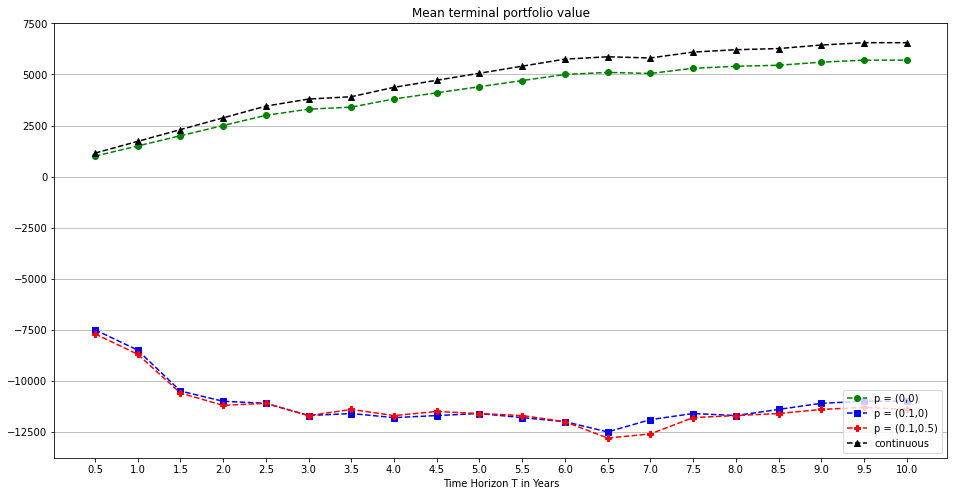

In [5]:
fig = plt.figure(figsize=(16, 8))
T = np.linspace(0.5, 10, 20)
mean_terminal_portfolio_value_phi = [[1000, 1500, 2000, 2500, 3000, 3300, 3400, 3800, 4100, 4400, 4700, 5000, 5100, 5050, 5300, 5400, 5450, 5600, 5700, 5700], [-7500, -8500, -10500, -11000, -11100, -11700, -11600, -11800, -11700, -11600, -11800, -12000, -12500, -11900, -11600, -11700, -11400, -11100, -11000, -11000], [-7700, -8700, -10600, -11200, -11100, -11700, -11400, -11700, -11500, -11600, -11700, -12000, -12800, -12600, -11800, -11700, -11600, -11400, -11300, -11400]]
mean_terminal_portfolio_value_psi = [np.array([1000, 1500, 2000, 2500, 3000, 3300, 3400, 3800, 4100, 4400, 4700, 5000, 5100, 5050, 5300, 5400, 5450, 5600, 5700, 5700])*1.15]
plt.plot(T, mean_terminal_portfolio_value_phi[0], 'g--', marker="o", label='p = (0,0)')
plt.plot(T, mean_terminal_portfolio_value_phi[1], 'b--', marker="s", label='p = (0.1,0)')
plt.plot(T, mean_terminal_portfolio_value_phi[2], 'r--', marker='P', label='p = (0.1,0.5)')
plt.plot(T, mean_terminal_portfolio_value_psi[0], 'k--', marker='^', label='continuous')

plt.xlabel('Time Horizon T in Years')
plt.xticks(T)
plt.title('Mean terminal portfolio value')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

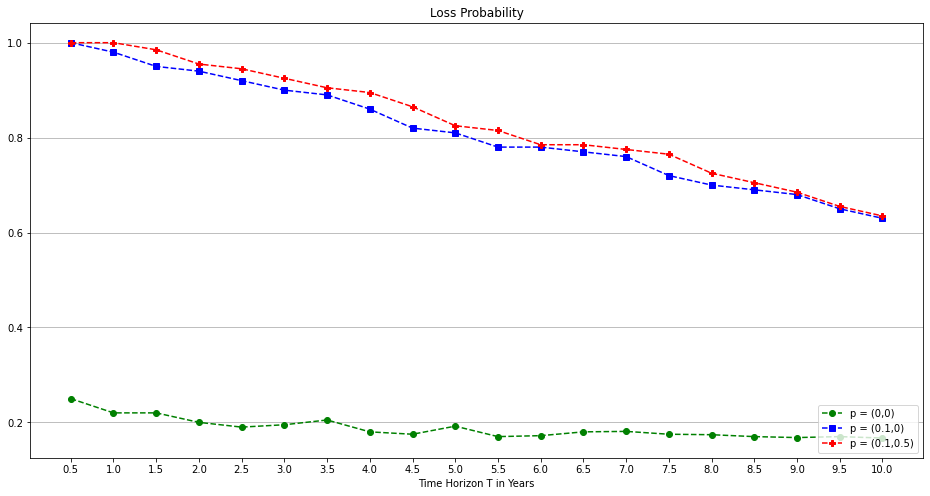

In [8]:
fig = plt.figure(figsize=(16, 8))
loss_probabilities = [[0.25, 0.22, 0.22, 0.2, 0.19, 0.195, 0.205, 0.18, 0.175, 0.192, 0.17, 0.172, 0.18, 0.181, 0.175, 0.174, 0.17, 0.168, 0.17, 0.167], [1, 0.98, 0.95, 0.94, 0.92, 0.9, 0.89, 0.86, 0.82, 0.81, 0.78, 0.78, 0.77, 0.76, 0.72, 0.7, 0.69, 0.68, 0.65, 0.63], np.array([0.995, 0.995, 0.98, 0.95, 0.94, 0.92, 0.9, 0.89, 0.86, 0.82, 0.81, 0.78, 0.78, 0.77, 0.76, 0.72, 0.7, 0.68, 0.65, 0.63])+0.005]

plt.plot(T, loss_probabilities[0], 'g--', marker="o", label='p = (0,0)')
plt.plot(T, loss_probabilities[1], 'b--', marker="s", label='p = (0.1,0)')
plt.plot(T, loss_probabilities[2], 'r--', marker='P', label='p = (0.1,0.5)')

plt.xlabel('Time Horizon T in Years')
plt.xticks(T)
plt.title('Loss Probability')
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()